In [88]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts

In [89]:
#lendo arquivo cvs
dataset = pd.read_csv('dados.csv', sep= ';')
dataset

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


Análise Exploratória

In [90]:
#Verificando se há erros nos dados categóricos:

#MUNICIPIO
#Verificando se há valores duplicados
#Há municipios duplicados, necessária correção e substituir os valores pela mediana

repetidos = dataset.duplicated(['MUNICIPIO'], keep = False)
dataset[repetidos]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [91]:
dataset[repetidos].groupby(['MUNICIPIO']).size()

MUNICIPIO
CERRO BRANCO                 2
DOUTOR MAURICIO CARDOSO      2
MATO LEITAO                  2
MONTE ALEGRE DOS CAMPOS      2
MULITERNO                    2
NOVA BOA VISTA               2
SANTA VITORIA DO PALMAR      2
SANTO ANTONIO DAS MISSOES    2
SANTO ANTONIO DO PLANALTO    2
TAQUARA                      2
dtype: int64

In [92]:
#verificando códigos repetidos
#Códigos repetidos necessária correção
repetidos = dataset.duplicated(['CODIGO'],keep= False)
dataset[repetidos]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [93]:
dataset[repetidos].groupby(['CODIGO']).size()

CODIGO
141    4
259    4
372    4
378    4
380    4
dtype: int64

In [94]:
#PIB
#Necessária substituição de outliers pela mediana
dataset['PIB'].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

{'boxes': [<matplotlib.patches.PathPatch at 0x7f11f5062c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f11f4ff51d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f11f4ffe210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f11f4ff5c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f11f506e710>,
  <matplotlib.lines.Line2D at 0x7f11f506ec50>]}

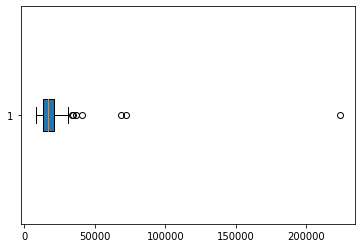

In [95]:
#analise gráfica de PIB
plt.boxplot(dataset['PIB'], vert= False, patch_artist= True)

(array([177.,   7.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  8236.63 ,  29797.789,  51358.948,  72920.107,  94481.266,
        116042.425, 137603.584, 159164.743, 180725.902, 202287.061,
        223848.22 ]),
 <a list of 10 Patch objects>)

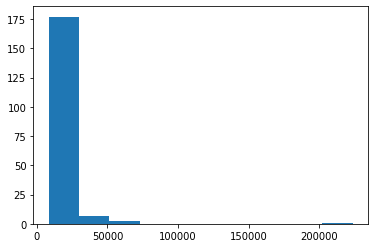

In [96]:
plt.hist(dataset['PIB'])

In [97]:
#VALOREMPENHO
dataset['VALOREMPENHO'].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

{'boxes': [<matplotlib.patches.PathPatch at 0x7f11f4f5c2d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f11f4f64850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f11f4f6a890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f11f4f6a310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f11f4f5cdd0>,
  <matplotlib.lines.Line2D at 0x7f11f4f64310>]}

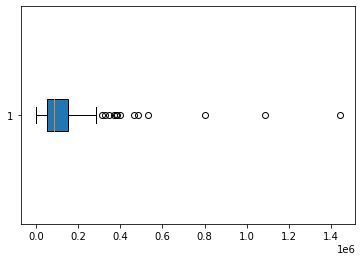

In [98]:
#analise com boxplot
#necessária substituição de outliers pela mediana
plt.boxplot(dataset['VALOREMPENHO'], vert = False, patch_artist= True)

In [99]:
#Verificando valores NaN
#não há
dataset.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

FAZENDO CORREÇÕES


In [100]:
#Eliminando valores com códigos repetidos
dataset.drop_duplicates(subset='CODIGO', keep= 'first', inplace= True)

#verificando se ainda tem valores repetidos
dataset[dataset.duplicated(['CODIGO'], keep = False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [101]:
#verificando se ainda há municipios repetidos
dataset[dataset.duplicated(["MUNICIPIO"], keep= False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [102]:
#PIB outliers

#calculando desvio padrão de PIB
desv = sts.stdev(dataset['PIB'])
desv

17650.23526703751

In [103]:
#calculando a mediana de PIB
mediana = sts.median(dataset['PIB'])
mediana

16846.77

In [104]:
#substituindo outliers maiores que 2 desvios padrões pela mediana
dataset.loc[dataset['PIB'] > 2 * desv, 'PIB'] = mediana

#veridicandos e ainda tem outliers
dataset.loc[dataset['PIB'] > 2 * desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [105]:
#Outliers de VALOREMPENHO

#calculando desvio padrão
desv = sts.stdev(dataset['VALOREMPENHO'])
desv

166939.00802593995

In [106]:
#calculando mediana
mediana = sts.median(dataset['VALOREMPENHO'])
mediana

83477.15

In [107]:
#substituindo valores maiores que 2 desvios padrões pela mediana
dataset.loc[dataset['VALOREMPENHO'] > 2 * desv, 'VALOREMPENHO'] = mediana

#verificando se ainda tem outliers
dataset.loc[dataset['VALOREMPENHO'] > 2 * desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


ANALISANDO DADOS

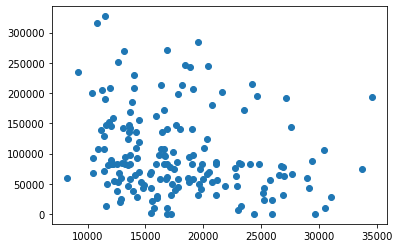

In [108]:
#Verificando se há relação entre PIB e VALOREMPENHO

plt.scatter(dataset.PIB, dataset.VALOREMPENHO)

(array([ 6., 36., 33., 34., 25., 10., 12.,  9.,  5.,  2.]),
 array([ 8236.63, 10869.82, 13503.01, 16136.2 , 18769.39, 21402.58,
        24035.77, 26668.96, 29302.15, 31935.34, 34568.53]),
 <a list of 10 Patch objects>)

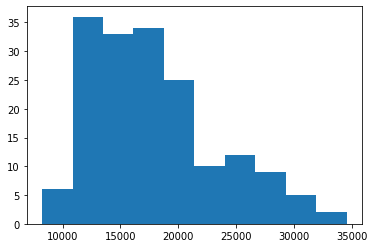

In [109]:
#histograma de PIB
plt.hist(dataset.PIB)

(array([25., 39., 48., 12., 18.,  9., 10.,  6.,  3.,  2.]),
 array([1.72130000e+02, 3.28433770e+04, 6.55146240e+04, 9.81858710e+04,
        1.30857118e+05, 1.63528365e+05, 1.96199612e+05, 2.28870859e+05,
        2.61542106e+05, 2.94213353e+05, 3.26884600e+05]),
 <a list of 10 Patch objects>)

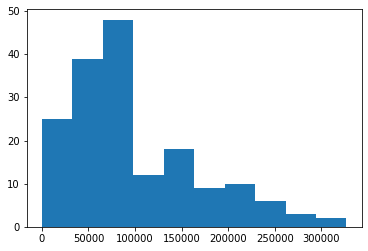

In [110]:
#histograma de VALOREMEPRNHO
plt.hist(dataset.VALOREMPENHO)

In [111]:
dataset.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,83477.15
1,113,SANTO ANGELO,16575.82,83477.15
2,118,SAO FRANCISCO DE ASSIS,12037.61,83477.15
3,13,CACAPAVA DO SUL,13674.54,83477.15
4,120,SAO GABRIEL,19912.38,83477.15
